# Analyze with technical indeicators

ここではどのような時に負けるか、どのような時に勝つのかを分析して、このbotの収益性を高める戦略の緒を探す。
そのためにマーケットの指標としてテクニカル指標を導入する。

具体的には、このテストで使ったOHLCVデータに対してテクニカル指標を追加し、それを取引ログに結合することで、勝ちトレードと負けトレードがどのような時に発生しているのかという傾向を探る。MACDについては、価格そのものに意味は薄いのでその変化率をみる。

また、勝ちおよび負けトレードが予測可能かどうかも探る。これは最初の80日をtrainに、そして残りの10日をtestに分割し、その予測精度としてRMSEの大きさを計測する。

この問題は2値分類問題であり、これが可能であるならば勝てそうなトレードに多く賭ける、負けそうなトレードには小さく賭けるor何も賭けないという普遍的な改善策を取ることができる。

ここでは一旦ロジスティック回帰と、後にRNNを試すことにする。

In [1]:
%matplotlib inline
import research_kit_bottom_trend_follow as rk

# datasets used in backtest
backtest_start_time = rk.datetime(2019,9,30,11,49)
backtest_end_time = rk.datetime(2019,12,29,11,49)
    
ohlcv_df_1min = rk.dataset_manager.get_ohlcv(start_time=backtest_start_time, end_time=backtest_end_time)

print(len(ohlcv_df_1min))

downloading BTC/USD data on bitmex
downloading 2020-01-06 22:52:30 ~ 2020-01-07 07:12:30 data
50.0% completed
downloading 2020-01-07 07:12:30 ~ 2020-01-07 11:24:41.409351 data
100.0% completed
Loading OHLCV data from bitmex_original_ohlcv_1min now...
Loading OHLCV data from bitmex_original_ohlcv_1min now...
129541


In [6]:
ohlcv_with_ta = rk.add_technical_statistics_to_ohlcv_df(ohlcv_df_1min)
start_time = rk.datetime(2019,12,29,6)
end_time = rk.datetime(2019,12,29,11)

Loading OHLCV data from bitmex_original_ohlcv_1min now...


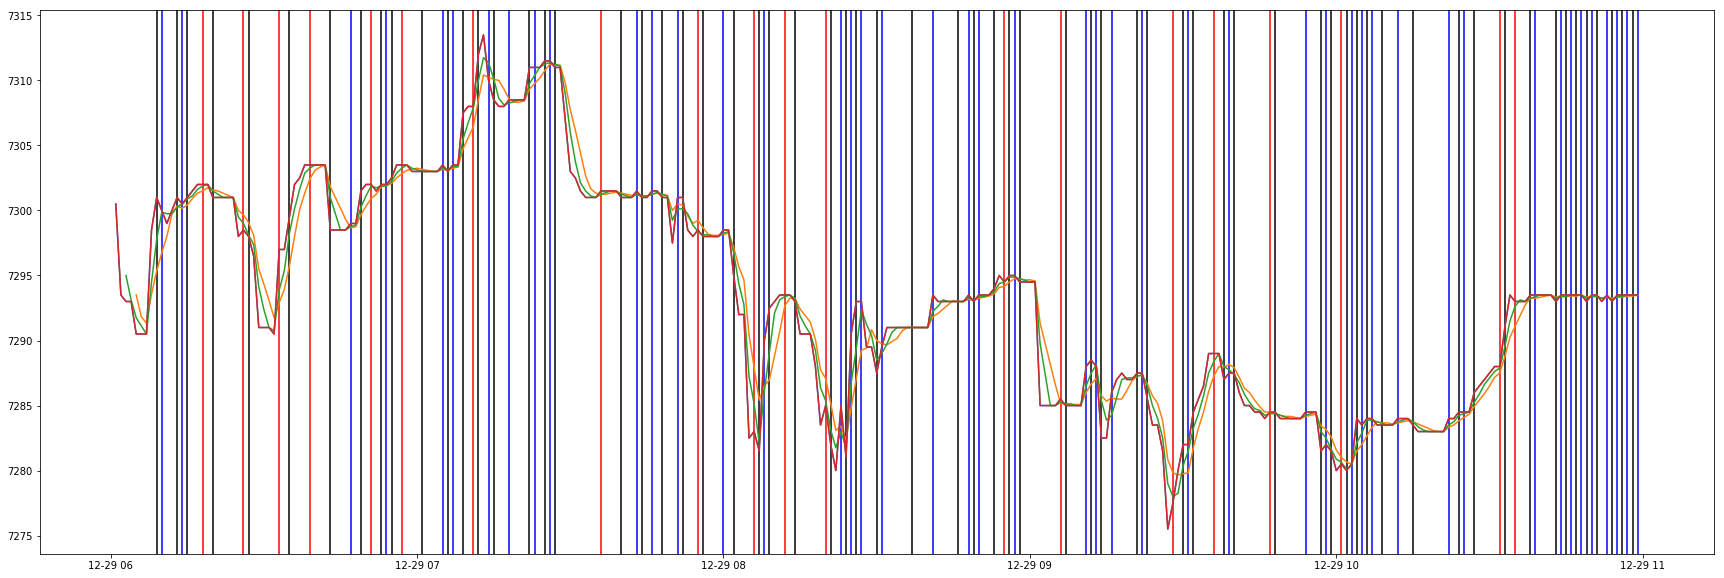

In [7]:
id_timeframe1_bottom5_middle3_top1 = rk.get_summary_id_by_params_set(1,5,3,1)
rk.generate_transaction_snapshot_by_summary_id(id_timeframe1_bottom5_middle3_top1, start_time, end_time)

黒のラインがエントリーポイント。赤のラインが勝利、青のラインが敗北。
最後の取引を見るとレンジ相場に弱そうである。
ところどころトレンド相場で負けているのも気になるところ。
勝ちトレードの平均取引時間が長いことも見て取れる。
また低い勝率ながら大き目の勝ちを重ねていることもわかる。

レンジ相場に入る直前の勝率が高そうな感じがする。
勝っているトレンド相場と負けているトレンド相場の違いも気になる。